# Trabajo Final

Alumnas: Giuliana Barbieri y Almendra Gandini

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00372/HTRU2.zip -O HTRU2.zip
!unzip -o HTRU2.zip

--2025-10-10 22:13:16--  https://archive.ics.uci.edu/ml/machine-learning-databases/00372/HTRU2.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘HTRU2.zip’

HTRU2.zip               [  <=>               ]   1.49M  4.05MB/s    in 0.4s    

2025-10-10 22:13:17 (4.05 MB/s) - ‘HTRU2.zip’ saved [1563015]

Archive:  HTRU2.zip
  inflating: HTRU_2.csv              
  inflating: HTRU_2.arff             
  inflating: Readme.txt              


# ¿Qué es un pulsar?

Un pulsar es una estrella de neutrones muy densa que gira rápidamente y emite ondas de radio desde sus polos magnéticos. Al girar, esos pulsos de radio pueden llegar periódicamente a la Tierra como señales de "tic tic tic", parecidas a un faro.
El problema es que esas señales son débiles y ruidosas, y pueden confundirse con otras interferencias o fenómenos naturales. Por eso usamos machine learning: para clasificar si una señal es de un pulsar real o no.



## ¿Qué datos tenemos?

Cuando un radiotelescopio detecta una señal del espacio, se hacen dos cosas:

  - Se registra cómo varía la señal en el tiempo (perfil del pulso).

  - Se analiza cómo varía la intensidad de la señal si corregimos la “dispersión” que produce el medio interestelar (DM-SNR curve).

Luego, se calculan estadísticas matemáticas sobre esas dos cosas: perfil y curva. Estas estadísticas son tus variables de entrada para entrenar un modelo.


## Columnas explicadas:

Profile_mean: Promedio de intensidad del "pulso" detectado	¿Qué tan fuerte es el pulso, en promedio?


Profile_stdev: Qué tanto varía esa intensidad	¿Es estable o muy cambiante el pulso?

Profile_skewness: Si el pulso es más alto en un lado que en otro	¿La forma del pulso es simétrica o se inclina más hacia un lado?


Profile_kurtosis: Qué tan picudo o plano es el pulso	¿Tiene un pico pronunciado o es más redondeado?


DM_mean: Promedio de la intensidad al aplicar distintas correcciones de dispersión	¿Qué tan fuerte es la señal corregida por distorsión del espacio?


DM_stdev: Qué tanto varía esa señal corregida	¿La señal cambia mucho si aplicás más o menos corrección?


DM_skewness: Simetría de esa curva de corrección	¿Hay una forma simétrica al buscar la mejor corrección?


DM_kurtosis: Qué tan picuda es esa curva	¿Hay un máximo muy claro o es más difusa?


class: Etiqueta: 1 = pulsar real, 0 = ruido u otra cosa	Lo que queremos predecir

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

columnas = [
    'Profile_mean', 'Profile_stdev', 'Profile_skewness', 'Profile_kurtosis',
    'DM_mean', 'DM_stdev', 'DM_skewness', 'DM_kurtosis', 'class'
]
df = pd.read_csv("HTRU_2.csv", header=None, names=columnas)
df

,Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis,class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


# Exploracion de datos:
## Veamos como se relacionan las features con el target mirando histogramas

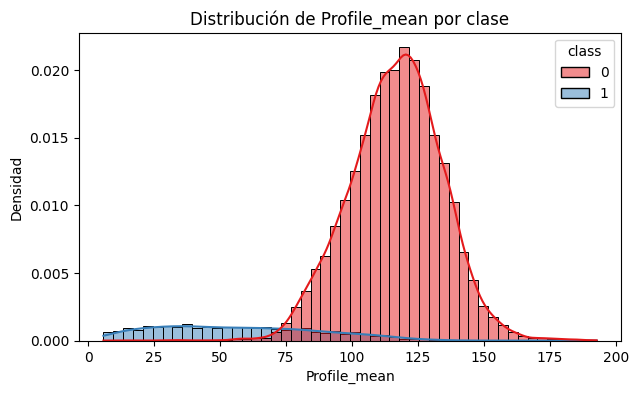

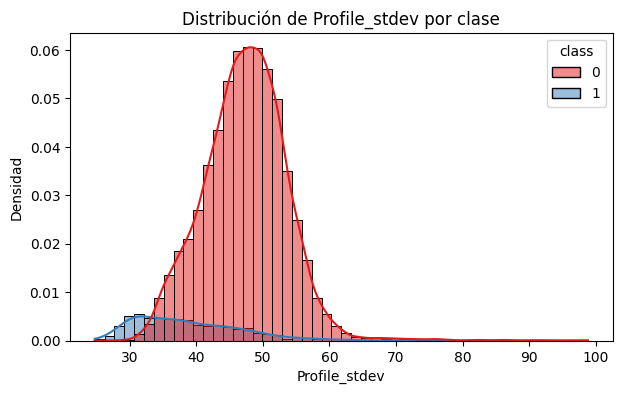

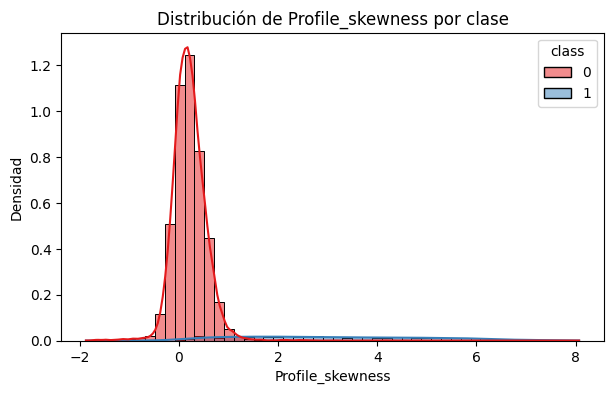

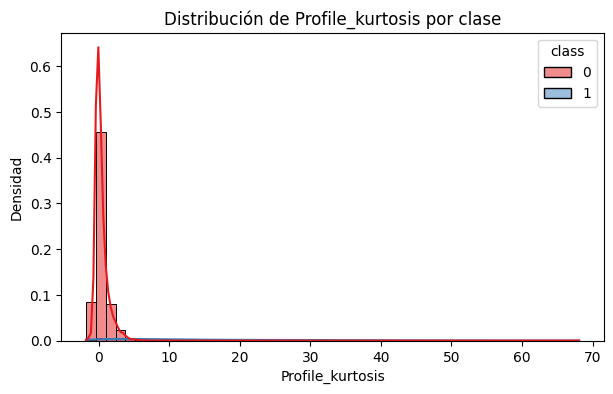

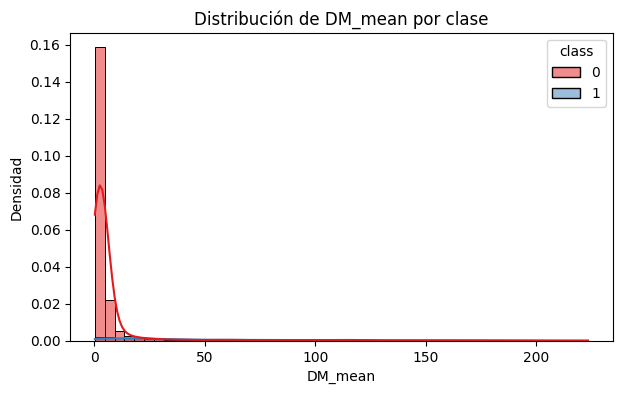

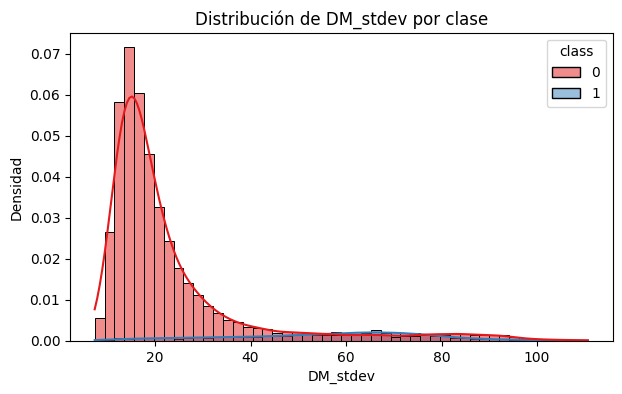

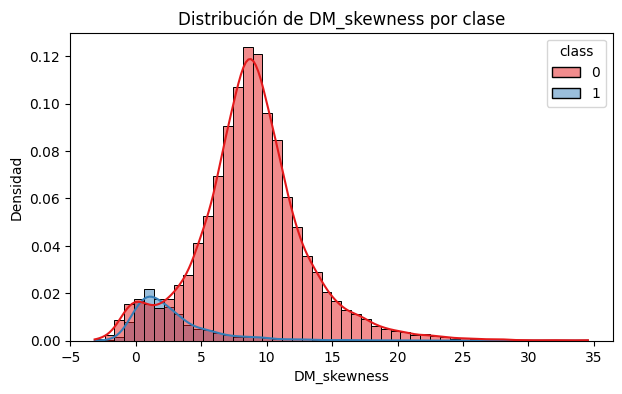

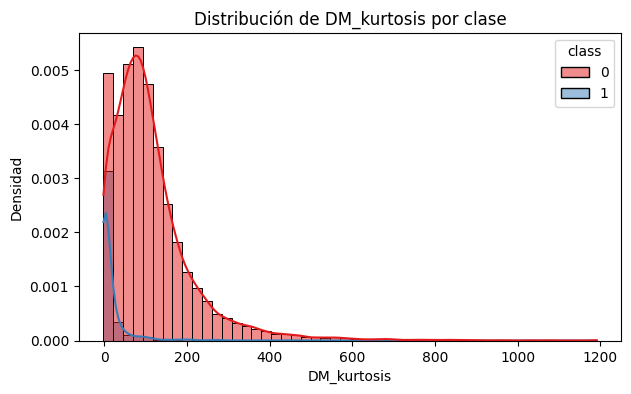

In [ ]:
for col in df.columns[:-1]:  # omitimos la columna 'class'
    plt.figure(figsize=(7, 4))
    sns.histplot(data=df, x=col, hue='class', bins=50, kde=True, stat='density', palette='Set1')
    plt.title(f'Distribución de {col} por clase')
    plt.xlabel(col)
    plt.ylabel('Densidad')
    plt.show()


## Veamos un pair plot para entender como relacionan las features de a pares

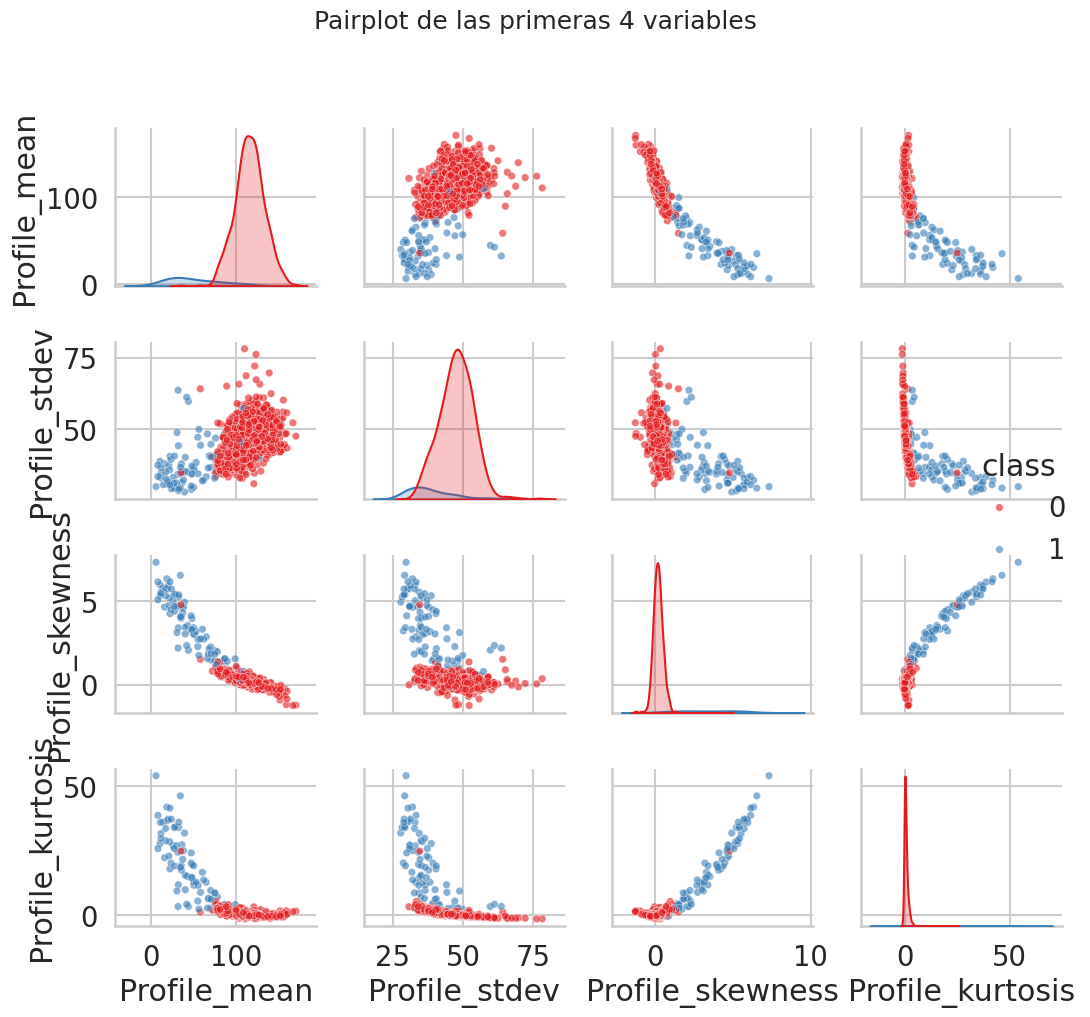

In [ ]:
# Para que no sea tan pesado, usamos una muestra
# df_sample = df.sample(1000, random_state=42)

# sns.pairplot(df_sample, hue='class', vars=df.columns[:4], palette='Set1')
# plt.suptitle('Pairplot de las primeras 4 variables', y=1.02)
# plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# Estilo general más limpio y grande
sns.set_context("talk", font_scale=1.2)  # "talk" o "poster" son ideales para presentaciones
sns.set_style("whitegrid")  # o "ticks" para algo más sobrio

# Muestra del dataset
df_sample = df.sample(1000, random_state=42)

# Pairplot
pair = sns.pairplot(
    df_sample,
    hue='class',
    vars=df.columns[:4],
    palette='Set1',
    plot_kws={'alpha': 0.6, 's': 30},   # transparencia y tamaño de los puntos
    diag_kws={'fill': True}
)

# Título más separado y claro
pair.fig.suptitle('Pairplot de las primeras 4 variables', y=1.03, fontsize=18)

plt.tight_layout()
plt.show()


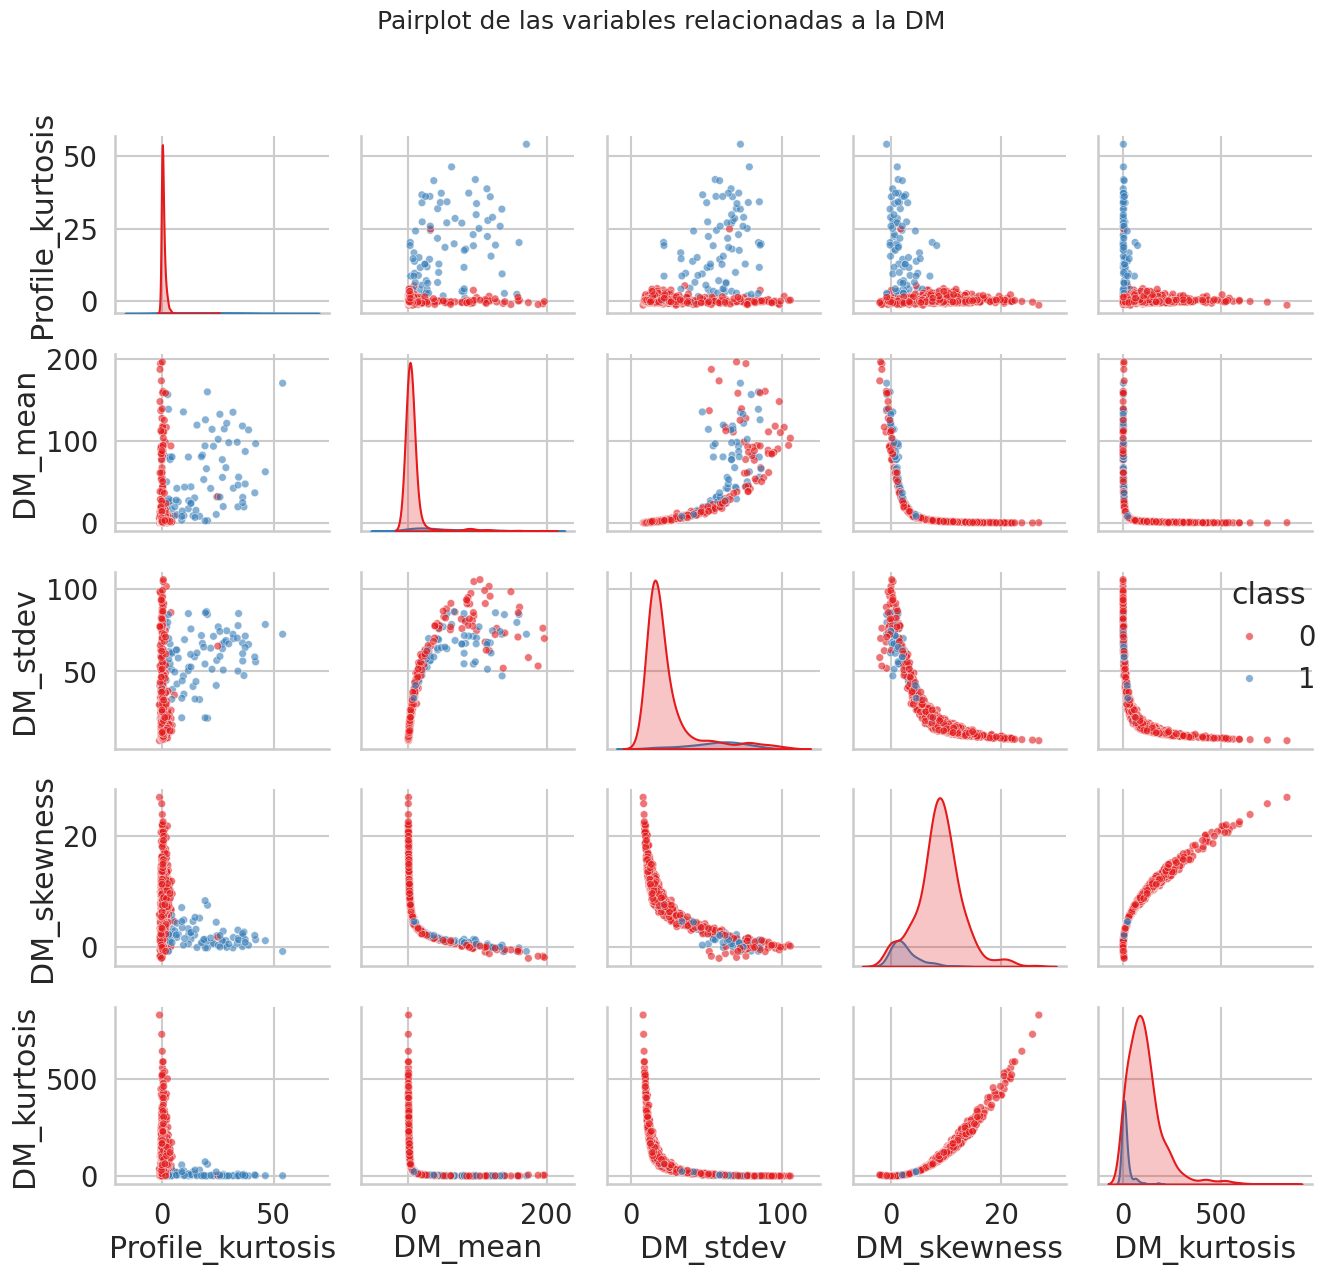

In [ ]:
# veamos las ultimas 4 columnas
# sns.pairplot(df_sample, hue='class', vars=df.columns[-6:-1], palette='Set1')
# plt.suptitle('Pairplot de las siguientes 4 variables: las DM', y=1.02)
# plt.show()
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo visual amigable para diapositivas
sns.set_context("talk", font_scale=1.2)  # Tamaño de texto ideal para presentaciones
sns.set_style("whitegrid")               # Fondo con grilla sutil

# Submuestra de datos
df_sample = df.sample(1000, random_state=42)

# Pairplot de variables DM
pair = sns.pairplot(
    df_sample,
    hue='class',
    vars=df.columns[-6:-1],  # Últimas 6 columnas excluyendo la última
    palette='Set1',
    plot_kws={'alpha': 0.6, 's': 30},
    diag_kws={'fill': True}
)

# Título y espaciado
pair.fig.suptitle('Pairplot de las variables relacionadas a la DM', y=1.03, fontsize=18)

plt.tight_layout()
plt.show()


###Conclusión:

En estos pairplot podemos distinguir zonas azules (pulsar positivo) en los gráficos, lo cual nos dice que estas features son explicativas, pero también vemos que ese patrón no es asi para todas las features.

Nos hicimos la siguiente pregunta:
### es necesario el tener las features de correccion de datos(relacionas a DM)?
Las features : DM_mean, DM_stdev, DM_skewness y DM_kurtosis son producidas a partir de las primeras 4, entonces qué tanto aportan a la prediccion? podriamos prescindir de la elaboracion de estas features adicionales?


Entrenamos 3 modelos: uno que tiene solo las features de profile, otro que solo tiene las featues de DM (las que se despenden de profile) y luego entrenamos un modelo con todas. Este ultimo lo hicimos para entender si las fearures de DM aportan significativamente a la clasificacion.

# Entrenamiento de los modelos:
- Optamos por el método XGBClassifier del paquete XGBoost que permite entrenar un modelo de clasificación.  Utiliza la técnica de Extreme Gradient Boosting, un algoritmo muy potente basado en el ensamble de árboles de decisión. Supone una mejora sobre otros métodos; es eficiente, rápido y robusto ante overfitting. Es útil para manejar el desbalanceo de clases, como el que se presenta en nuestro caso en la variable target.


--- Ejecutando Modelo Profile Features ---


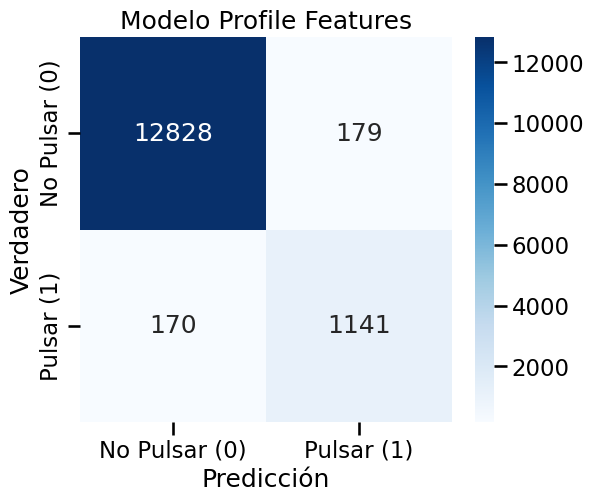


==> Resultados para Modelo Profile Features <==

Accuracy global (cross-validation): 0.976

Reporte de clasificación (cross-validation):

               precision    recall  f1-score   support

No Pulsar (0)       0.99      0.99      0.99     13007
   Pulsar (1)       0.86      0.87      0.87      1311

     accuracy                           0.98     14318
    macro avg       0.93      0.93      0.93     14318
 weighted avg       0.98      0.98      0.98     14318


--- Ejecutando Modelo DM Features ---


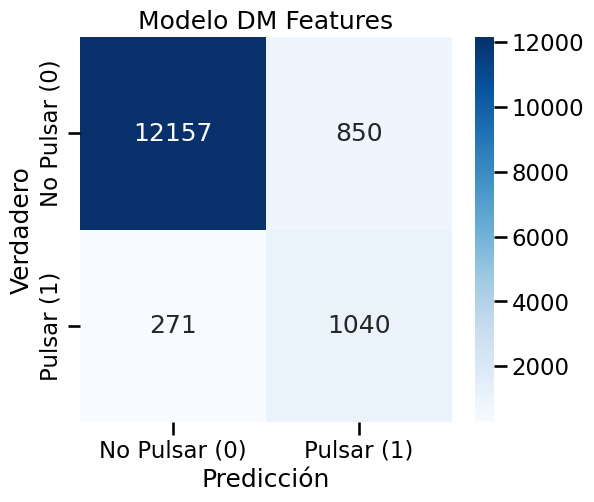


==> Resultados para Modelo DM Features <==

Accuracy global (cross-validation): 0.922

Reporte de clasificación (cross-validation):

               precision    recall  f1-score   support

No Pulsar (0)       0.98      0.93      0.96     13007
   Pulsar (1)       0.55      0.79      0.65      1311

     accuracy                           0.92     14318
    macro avg       0.76      0.86      0.80     14318
 weighted avg       0.94      0.92      0.93     14318


--- Ejecutando Modelo ALL ---


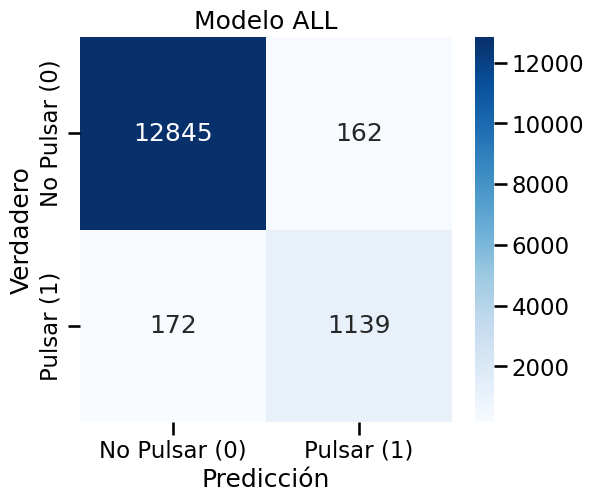


==> Resultados para Modelo ALL <==

Accuracy global (cross-validation): 0.977

Reporte de clasificación (cross-validation):

               precision    recall  f1-score   support

No Pulsar (0)       0.99      0.99      0.99     13007
   Pulsar (1)       0.88      0.87      0.87      1311

     accuracy                           0.98     14318
    macro avg       0.93      0.93      0.93     14318
 weighted avg       0.98      0.98      0.98     14318



In [ ]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("talk")

def entrenar(df, variables_predictoras,nombre_modelo):

    X = df[variables_predictoras]  # variables predictoras
    y = df['class']  # Target

    # 2. Dividir en train y test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # 3. Calcular scale_pos_weight = #negativos / #positivos
    neg, pos = (y_train == 0).sum(), (y_train == 1).sum()
    scale_pos_weight = neg / pos

    # 4. Definir el modelo con ajuste de peso
    model = XGBClassifier(
        eval_metric='logloss',
        scale_pos_weight=scale_pos_weight,
        random_state=42
    )

    # 5. Cross-validation para obtener predicciones en el set de entrenamiento
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    y_pred_cv = cross_val_predict(model, X_train, y_train, cv=cv)

    # 6. Matriz de confusión con estilo limpio
    cm = confusion_matrix(y_train, y_pred_cv)
    labels = ['No Pulsar (0)', 'Pulsar (1)']
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicción')
    plt.ylabel('Verdadero')
    plt.title(f'{nombre_modelo}')
    plt.show()


    # 7. Métricas con cross-validation
    acc = accuracy_score(y_train, y_pred_cv)
    print(f"\n==> Resultados para {nombre_modelo} <==")
    print(f"\nAccuracy global (cross-validation): {acc:.3f}")
    print("\nReporte de clasificación (cross-validation):\n")
    print(classification_report(y_train, y_pred_cv, target_names=labels))

    #Entrenar el modelo final con todos los datos de entrenamiento
    model.fit(X_train, y_train)

    # Obtener probabilidades para el conjunto de prueba X_test (para curva ROC)
    y_proba = model.predict_proba(X_test)[:, 1]

    return model, X_test, y_test, y_proba

modelos = [
    ("Modelo Profile Features", [col for col in df.columns if col not in ['class', "DM_mean", "DM_stdev", "DM_skewness", "DM_kurtosis"]]),
    ("Modelo DM Features", [col for col in df.columns if col not in ['class', "Profile_mean", "Profile_stdev", "Profile_skewness", "Profile_kurtosis"]]),
    ("Modelo ALL", [col for col in df.columns if col not in ['class']])
]

resultados_modelos = []

for nombre, vars_modelo in modelos:
    print(f"\n--- Ejecutando {nombre} ---")
    modelo, X_test, y_test, y_proba = entrenar(df, vars_modelo, nombre)
    resultados_modelos.append({
        "nombre": nombre,
        "modelo": modelo,
        "X_test": X_test,
        "y_test": y_test,
        "y_proba": y_proba
    })


#Validación de Modelos
Se evaluaron los tres modelos utilizando la matriz de confusión y métricas como accuracy, precisión y recall, para obtener una visión más completa del desempeño.

## Matriz de Confusión
Permite visualizar cómo se distribuyen los aciertos y errores entre clases, identificando confusiones frecuentes y posibles desbalances en la clasificación.

## Accuracy
Mide el porcentaje total de aciertos del modelo. Es útil como métrica general, pero puede ser engañosa si las clases están desbalanceadas.

## Precisión y Recall
Precisión: Qué proporción de las predicciones positivas fueron correctas.

Recall: Qué proporción de los casos positivos reales fueron correctamente identificados.

Estas métricas por clase ayudan a evaluar el rendimiento del modelo en profundidad, especialmente cuando hay clases más difíciles de predecir.

## Conclusión
Los resultados muestran que las 4 nuevas features derivadas de Data Mining no aportaron mejoras significativas. Las métricas se mantuvieron similares entre modelos, lo que sugiere que estas variables no agregaron valor sustancial al proceso de predicción.

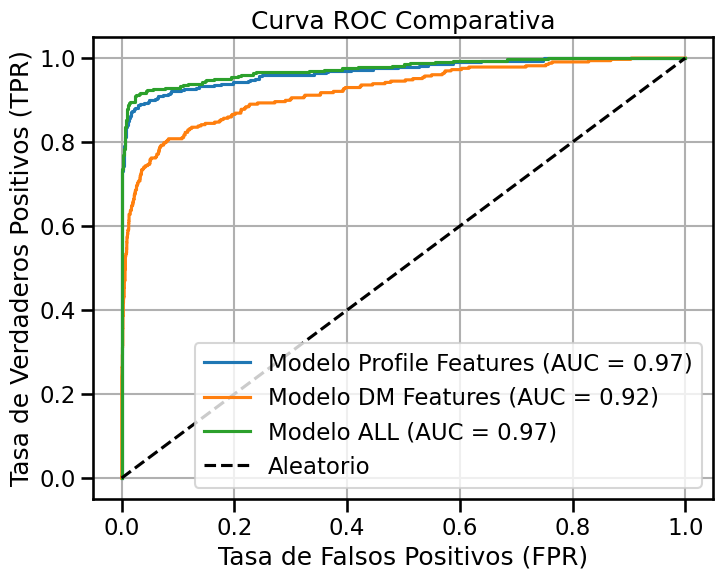

In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 6))

for resultado in resultados_modelos:
    fpr, tpr, _ = roc_curve(resultado["y_test"], resultado["y_proba"])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{resultado["nombre"]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC Comparativa')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### OBSERVACIÓN: Podemos observar que el Modelo DM Features muestra un desempeño inferior con un AUC de 0.92, evidenciando mayor cantidad de falsos positivos. Tanto el Modelo Profile Features como el Modelo ALL alcanzan un AUC de 0.97, lo que indica una muy buena capacidad de predicción. Aunque el modelo ALL no mejora el AUC respecto al modelo Profile Features, podemos decir que su rendimiento general es levemente más estable que el anterior mencionado, con un valor de precisión mayor al momento de clasificar la clase 1 (diferencia de 2 puntos).

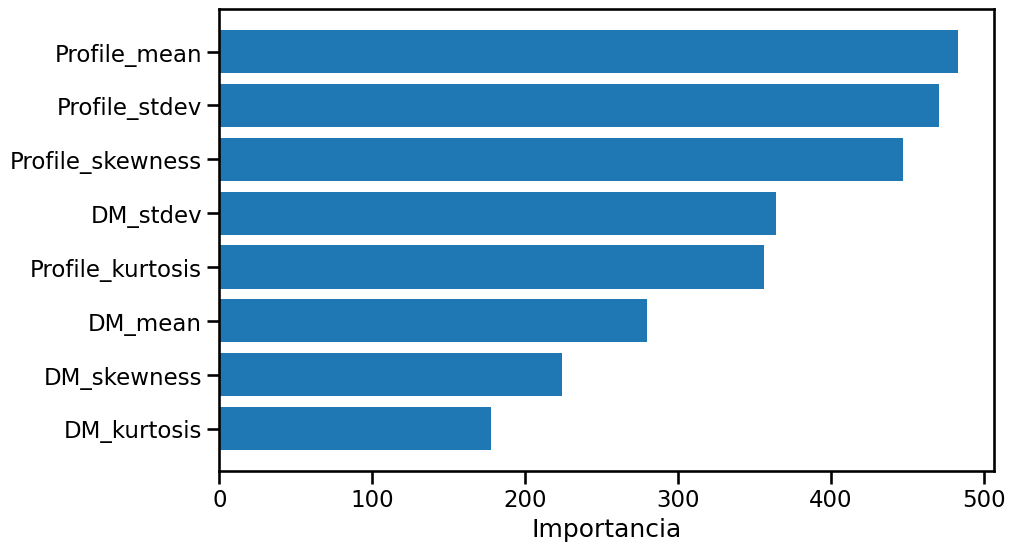

In [ ]:
# 6. Feature importance
modelo_all = next(m for m in resultados_modelos if m['nombre'] == 'Modelo ALL')


modelo_entrenado = modelo_all['modelo']

plt.figure(figsize=(10, 6))
xgb_plot = modelo_entrenado.get_booster().get_score(importance_type='weight')
importance_df = pd.DataFrame({
    'Feature': list(xgb_plot.keys()),
    'Importance': list(xgb_plot.values())
}).sort_values(by='Importance', ascending=False)

plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importancia')
#plt.title('Importancia de features (XGBoost)')
plt.gca().invert_yaxis()
plt.show()

###OBSERVACIÓN: La mayoría de las características asociadas al perfil del pulso ocupan un lugar destacado en términos de importancia dentro del modelo, por encima de aquellas vinculadas a la DM-SNR curve. Esto sugiere que las primeras tienen mayor peso y capacidad predictiva para distinguir púlsares respecto de las variables relacionadas al DM. Sin embargo, independientemente de las diferencias en su nivel de importancia, todas las variables predictoras aportan información en mayor o menor medida dentro del proceso de predicción.